In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from zipfile import ZipFile 

file_name="/content/drive/MyDrive/pkl.zip"

with ZipFile(file_name,"r") as zip: zip.extractall()

In [4]:
x_train=pickle.load(open("x_train.pkl","rb"))
y_train=pickle.load(open("y_train.pkl","rb"))
x_test=pickle.load(open("x_test.pkl","rb"))
y_test=pickle.load(open("y_test.pkl","rb"))
x_val=pickle.load(open("x_val.pkl","rb"))
y_val=pickle.load(open("y_val.pkl","rb"))

In [5]:
print(f"x_train: {len(x_train)}")
print(f"x_val: {len(x_val)}")
print(f"x_test: {len(x_test)}")

x_train: 6984
x_val: 874
x_test: 874


In [6]:
import tensorflow as tf

In [7]:
model=tf.keras.Sequential()

In [8]:
model.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",input_shape=(128,128,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [9]:
model.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))

In [10]:
model.add(tf.keras.layers.Flatten())

In [11]:
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [12]:
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [13]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [14]:
results=model.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_val,y_val))

Epoch 1/50
55/55 [==============================] - 23s 233ms/step - loss: 2.0045 - accuracy: 0.2582 - val_loss: 1.4942 - val_accuracy: 0.5229
Epoch 2/50
55/55 [==============================] - 10s 183ms/step - loss: 1.4550 - accuracy: 0.4880 - val_loss: 1.0083 - val_accuracy: 0.6693
Epoch 3/50
55/55 [==============================] - 10s 181ms/step - loss: 1.1657 - accuracy: 0.6008 - val_loss: 0.7994 - val_accuracy: 0.7449
Epoch 4/50
55/55 [==============================] - 10s 182ms/step - loss: 0.9251 - accuracy: 0.6929 - val_loss: 0.6956 - val_accuracy: 0.7849
Epoch 5/50
55/55 [==============================] - 10s 183ms/step - loss: 0.7827 - accuracy: 0.7390 - val_loss: 0.6075 - val_accuracy: 0.8101
Epoch 6/50
55/55 [==============================] - 10s 184ms/step - loss: 0.6529 - accuracy: 0.7905 - val_loss: 0.5343 - val_accuracy: 0.8352
Epoch 7/50
55/55 [==============================] - 10s 184ms/step - loss: 0.5437 - accuracy: 0.8190 - val_loss: 0.4880 - val_accuracy: 0.8501

In [15]:
model.evaluate(x_test,y_test)

28/28 [==============================] - 1s 28ms/step - loss: 0.6497 - accuracy: 0.8719


[0.6496849656105042, 0.8718535304069519]

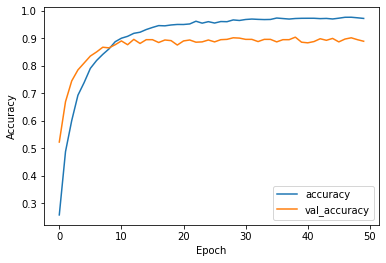

In [16]:
plt.plot(results.history["accuracy"],label="accuracy")
plt.plot(results.history["val_accuracy"],label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

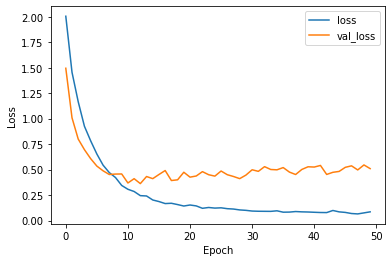

In [17]:
plt.plot(results.history["loss"],label="loss")
plt.plot(results.history["val_loss"],label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()